In [1]:
%load_ext autoreload
%autoreload 2

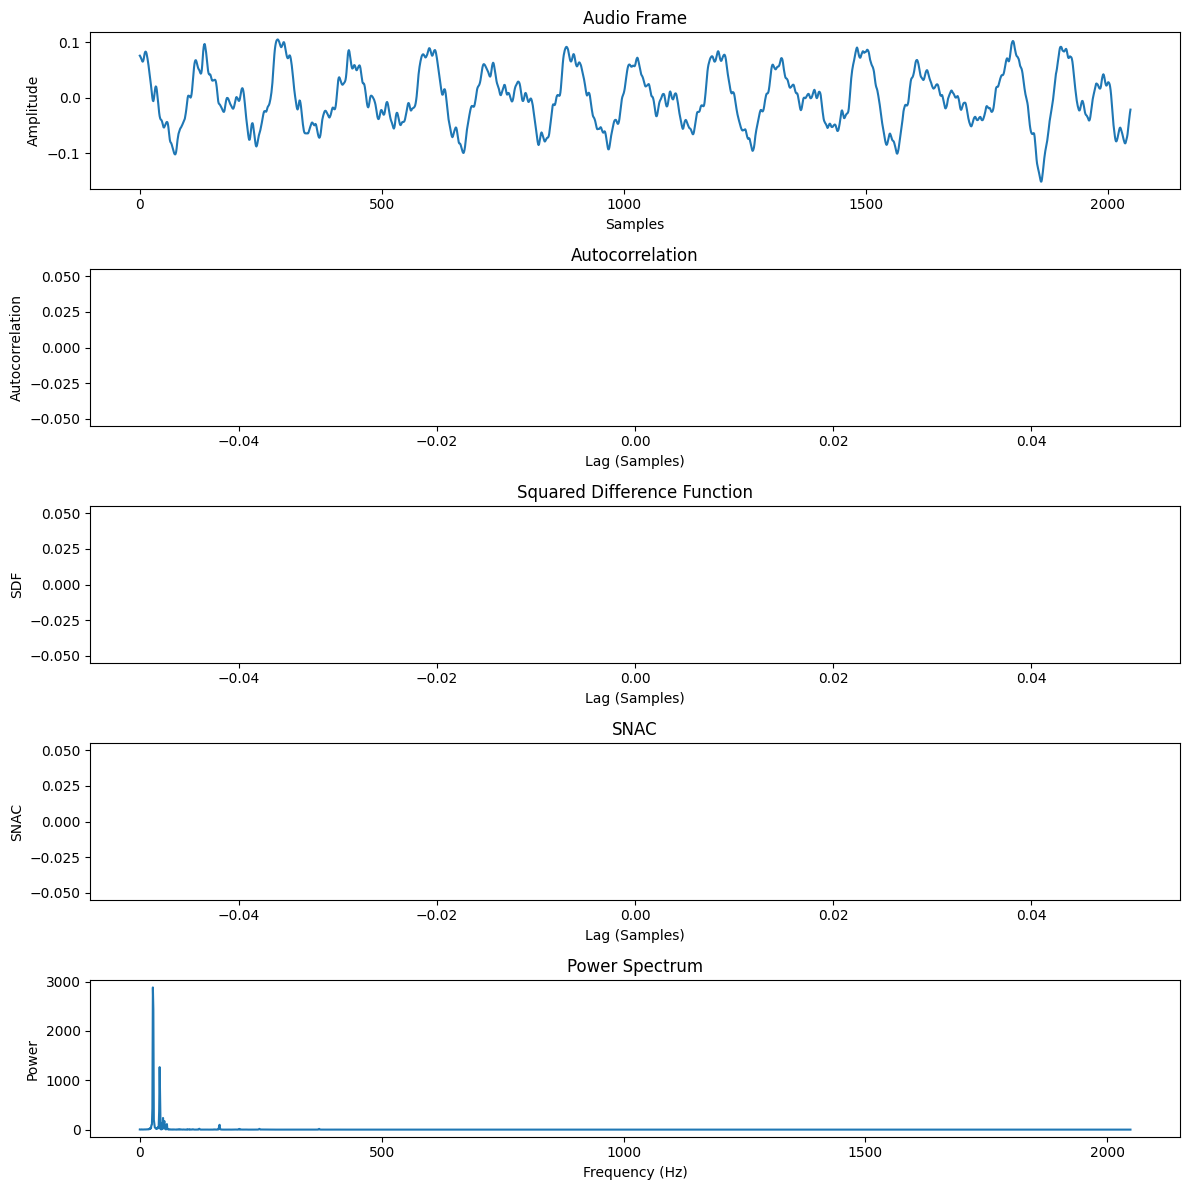

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sys
sys.path.append('..')

from app.modules.pitch.Yin2 import autocorrelation_fft, square_difference_fct, snac_fct


AUDIO_FILEPATH = 'data/audio_files/user_fugue2.mp3'

audio_data, sr = librosa.load(AUDIO_FILEPATH, sr=None)
frame_size = 2048
audio_frame = audio_data[frame_size*10:frame_size*11]
tau_max = frame_size

# Call the autocorrelation function
autocorr, power_spec = autocorrelation_fft(audio_frame, tau_max)
sdf, power_spec = square_difference_fct(audio_frame, tau_max)
snac, power_spec = snac_fct(audio_frame, tau_max)

# Create a figure and axes
fig, axs = plt.subplots(5, 1, figsize=(12, 12))  # 4 rows, 1 column

# Plot the audio frame
axs[0].plot(audio_frame[:frame_size])
axs[0].set_title('Audio Frame')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

# Plot the autocorrelation result
axs[1].plot(autocorr)
axs[1].set_title('Autocorrelation')
axs[1].set_xlabel('Lag (Samples)')
axs[1].set_ylabel('Autocorrelation')

# Plot the squared difference function
axs[2].plot(sdf)
axs[2].set_title('Squared Difference Function')
axs[2].set_xlabel('Lag (Samples)')
axs[2].set_ylabel('SDF')

# Plot the SNAC
axs[3].plot(snac)
axs[3].set_title('SNAC')
axs[3].set_xlabel('Lag (Samples)')
axs[3].set_ylabel('SNAC')

# Plot the power spectrum
axs[4].plot(power_spec)
axs[4].set_title('Power Spectrum')
axs[4].set_xlabel('Frequency (Hz)')
axs[4].set_ylabel('Power')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

Computing pitches with tau_max = 225


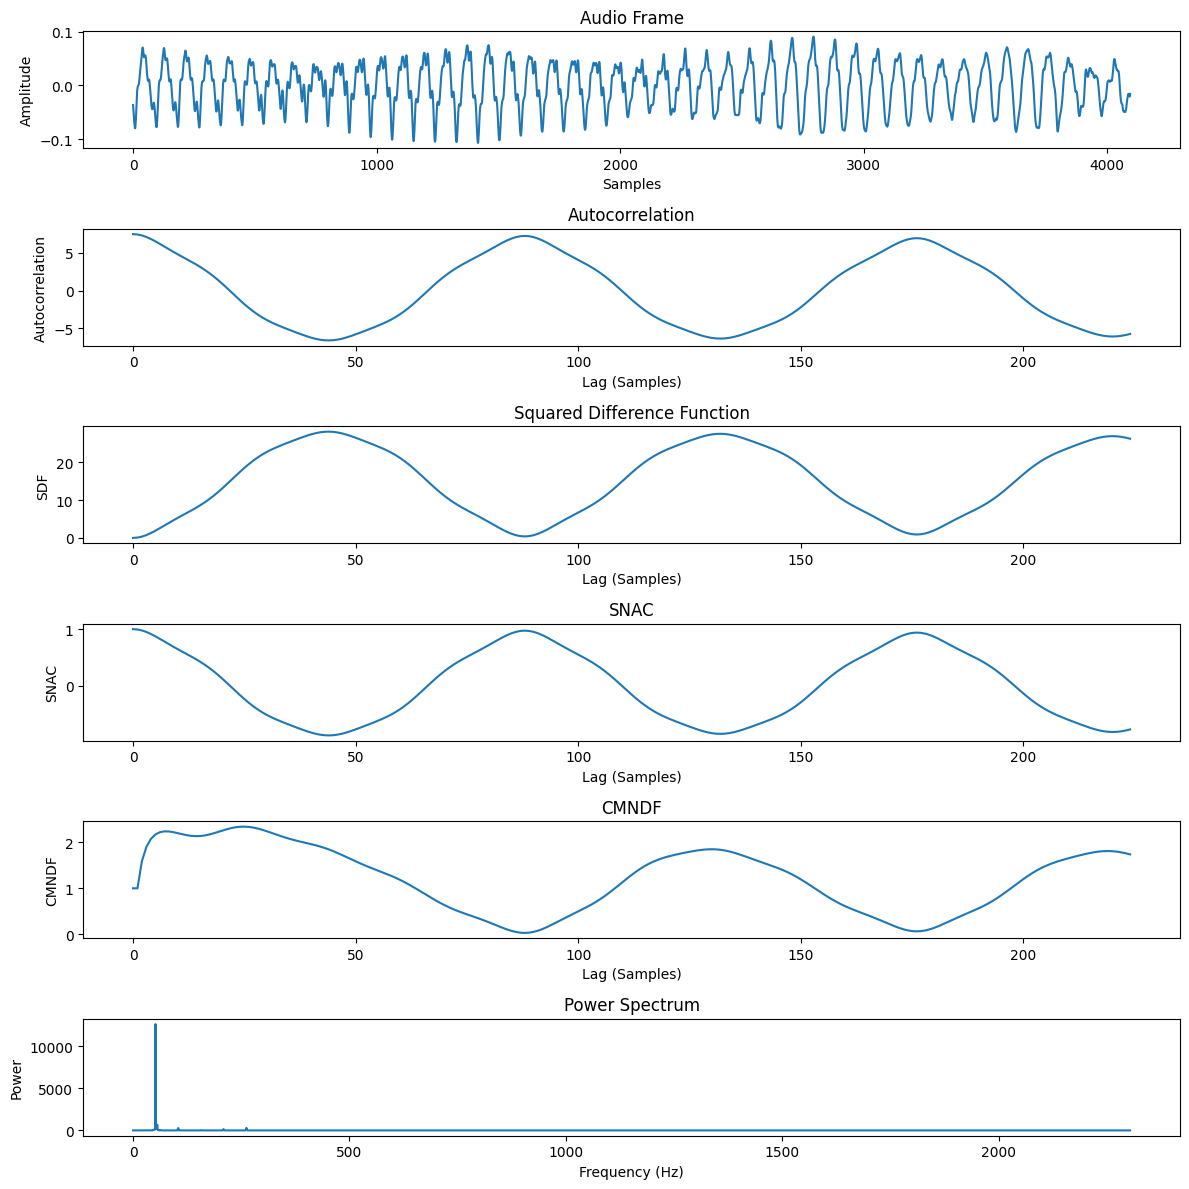

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sys
sys.path.append('..')

from app.modules.pitch.Yin2 import autocorrelation_fft, square_difference_fct, snac_fct, cmndf


AUDIO_FILEPATH = 'data/audio_files/user_fugue2.mp3'
MIN_VIOLIN_FREQ = 196.0

audio_data, sr = librosa.load(AUDIO_FILEPATH, sr=None)
frame_size = 2048*2
audio_frame = audio_data[frame_size*20:frame_size*21]
tau_max = int(sr/MIN_VIOLIN_FREQ) # Window size big enough to detect lowest f0 (largest period) of the violin
print(f"Computing pitches with tau_max = {tau_max}")

# Call the autocorrelation function
autocorr, power_spec = autocorrelation_fft(audio_frame, tau_max)
sdf, power_spec = square_difference_fct(audio_frame, tau_max)
snac, power_spec = snac_fct(audio_frame, tau_max)
cmndf_res, power_spec = cmndf(audio_frame, tau_max)

# Create a figure and axes
fig, axs = plt.subplots(6, 1, figsize=(12, 12))  # 4 rows, 1 column

# Plot the audio frame
axs[0].plot(audio_frame)
axs[0].set_title('Audio Frame')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

# Plot the autocorrelation result
axs[1].plot(autocorr)
axs[1].set_title('Autocorrelation')
axs[1].set_xlabel('Lag (Samples)')
axs[1].set_ylabel('Autocorrelation')

# Plot the squared difference function
axs[2].plot(sdf)
axs[2].set_title('Squared Difference Function')
axs[2].set_xlabel('Lag (Samples)')
axs[2].set_ylabel('SDF')

# Plot the SNAC
axs[3].plot(snac)
axs[3].set_title('SNAC')
axs[3].set_xlabel('Lag (Samples)')
axs[3].set_ylabel('SNAC')

# Plot the CMNDF
axs[4].plot(cmndf_res)
axs[4].set_title('CMNDF')
axs[4].set_xlabel('Lag (Samples)')
axs[4].set_ylabel('CMNDF')

# Plot the power spectrum
axs[5].plot(power_spec)
axs[5].set_title('Power Spectrum')
axs[5].set_xlabel('Frequency (Hz)')
axs[5].set_ylabel('Power')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()

Computing pitches with tau_max = 225
Plotting trough at x=14.27628752097182, y=2.137493924770396, probability=0.0
Plotting trough at x=87.9795358314928, y=0.026467618696589226, probability=0.8318998899851925
Plotting trough at x=176.0522402557519, y=0.06063658511437682, probability=0.08716520115999558


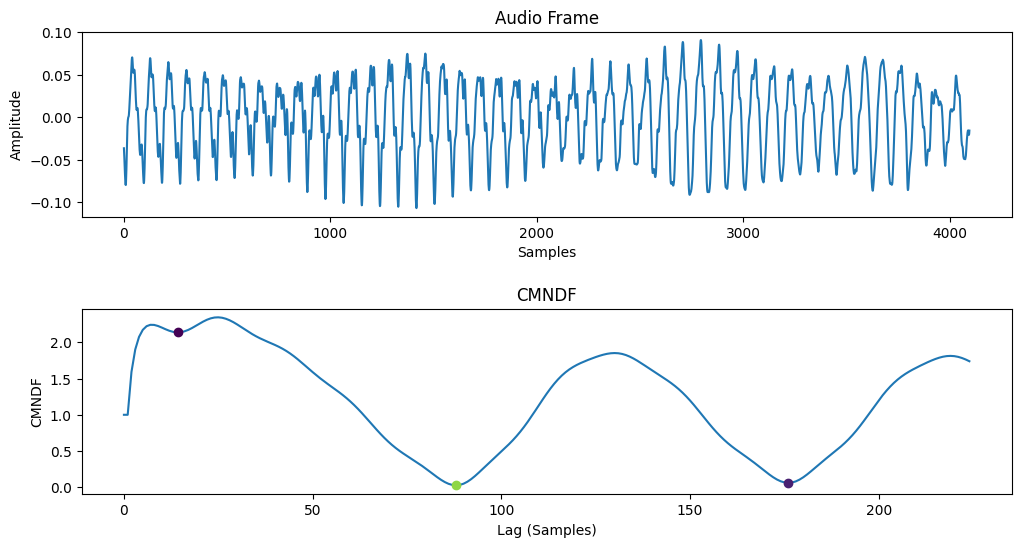

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import sys
import scipy.signal
sys.path.append('..')

from app.modules.pitch.Yin2 import cmndf, parabolic_interpolation, pitch_probabilities2


AUDIO_FILEPATH = 'data/audio_files/user_fugue2.mp3'
MIN_VIOLIN_FREQ = 196.0

audio_data, sr = librosa.load(AUDIO_FILEPATH, sr=None)
frame_size = 2048*2
audio_frame = audio_data[frame_size*20:frame_size*21]
tau_max = int(sr/MIN_VIOLIN_FREQ) # Window size big enough to detect lowest f0 (largest period) of the violin
print(f"Computing pitches with tau_max = {tau_max}")

# Call the autocorrelation functiond
cmndf_frame, power_spec = cmndf(audio_frame, tau_max)

# base_trough_indices = scipy.signal.argrelmin(cmndf_res, order=1)[0]
# troughs = [parabolic_interpolation(cmndf_frame, x) for x in base_trough_indices]

frame_troughs = pitch_probabilities2(cmndf_frame)


# Create a figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 6))  # 4 rows, 1 column
plt.subplots_adjust(hspace=0.5)  # Increase the vertical space between plots

# Plot the audio frame
axs[0].plot(audio_frame)
axs[0].set_title('Audio Frame')
axs[0].set_xlabel('Samples')
axs[0].set_ylabel('Amplitude')

# Plot the CMNDF
axs[1].plot(cmndf_frame)  
axs[1].set_title('CMNDF')
axs[1].set_xlabel('Lag (Samples)')
axs[1].set_ylabel('CMNDF')

# Plot the parabolic interpolated troughs
# Plot the color as the trough.probability
for trough in frame_troughs:
    color = plt.cm.viridis(trough.probability)
    print(f"Plotting trough at x={trough.x}, y={trough.y}, probability={trough.probability}")
    axs[1].plot(trough.x, trough.y, 'o', color=color)

In [40]:
trough_y_vals = np.array([trough.y for trough in troughs])
trough_x_vals = np.array([trough.x for trough in troughs])

N_THRESHOLDS = 100
thresholds = np.linspace(0, 1, N_THRESHOLDS+1)

# Bool array indicating if the trough height is below the threshold
# Outer array corresponds to the troughs, inner array is bool truthiness 
# for each threshold
trough_thresholds = np.less.outer(trough_y_vals, thresholds)

# Define prior over the troughs
trough_ranks = np.cumsum(trough_thresholds, axis=0) - 1 # the index of the trough in the sorted list
n_troughs = np.count_nonzero(trough_thresholds, axis=0)

print(f"Trough y values\n---\n{trough_y_vals}")
print(f"Trough x values\n---\n{trough_x_vals}")
print(f"Trough thresholds\n---\n{trough_thresholds}")
print(f"Trough ranks\n---\n{trough_ranks}")
print(f"Number of detected troughs per threshold\n---\n{n_troughs}")

Trough y values
---
[2.13749392 0.02646762 0.06063659]
Trough x values
---
[ 14.27628752  87.97953583 176.05224026]
Trough thresholds
---
[[False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False False False False False False False False
  False False False False False]
 [False False False  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  

In [44]:
BOLTZMANN_PARAM = 2.0
trough_prior = scipy.stats.boltzmann.pmf(
    trough_ranks, BOLTZMANN_PARAM, n_troughs
)
trough_prior[~trough_thresholds] = 0

N_THRESHOLDS = 100
thresholds = np.linspace(0, 1, N_THRESHOLDS + 2)

beta_cdf = scipy.stats.beta.cdf(thresholds, 2, 18) # Why 2, 18?
beta_probs = np.diff(beta_cdf)
probs = trough_prior.dot(beta_probs)

print(f"Trough probabilities: {probs}")
    

# Plotting
# fig, axs = plt.subplots(1, 1, figsize=(12, 6))  # 1 row, 1 column

# axs.set_xlabel('Trough Ranks')
# axs.set_ylabel('Trough Prior')
# axs.set_title('Trough Prior Distribution')
# axs.grid(True)
# axs.legend()

# plt.show()

Trough probabilities: [0.         0.81831909 0.07353736]


In [42]:
global_min = np.argmin(trough_y_vals)
n_thresholds_below_min = np.count_nonzero(~trough_thresholds[global_min, :])

print(f"Global min: {global_min}\nNumber of thresholds below min: {n_thresholds_below_min}")

Global min: 1
Number of thresholds below min: 3


In [46]:
NO_TROUGH_PROB = 0.01
for index, trough_threshold in np.ndenumerate(trough_thresholds):
    thresholds_below_min = np.count_nonzero(trough_threshold)
    probs[index[0]] += NO_TROUGH_PROB * np.sum(beta_probs[:thresholds_below_min])

print(f"Updated trough probabilities: {probs}")

Updated trough probabilities: [0.         0.83300881 0.08762749]


In [22]:
sys.path.append('..')
from app.modules.pitch.Yin2 import PYin
import matplotlib.cm as cm

AUDIO_FILEPATH = 'data/audio_files/user_fugue2.mp3'
MIN_VIOLIN_FREQ = 196.0

audio_data, sr = librosa.load(AUDIO_FILEPATH, sr=None)
pitches, most_likely_pitches = PYin.pyin(audio_data)

Starting pYIN algorithm...
Processing frame 4604/4604
Done!


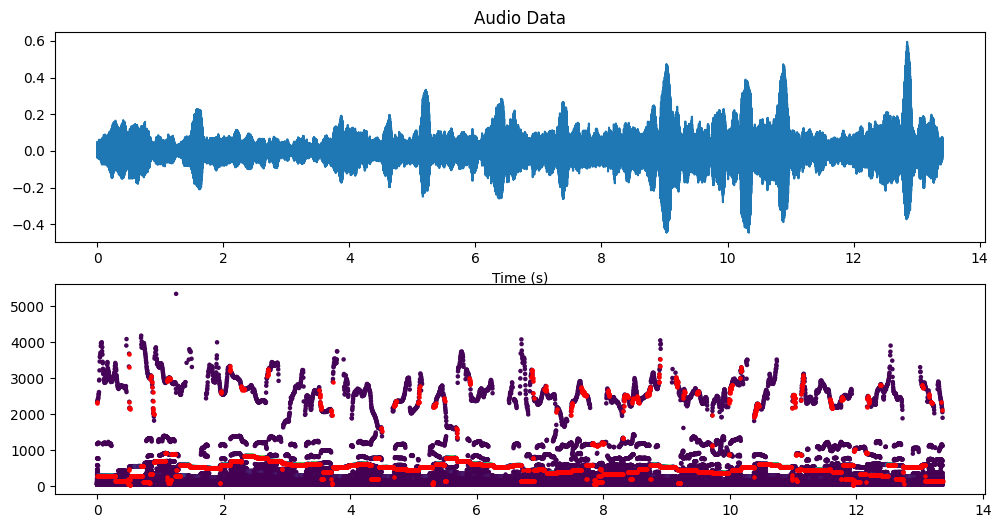

In [23]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Create a figure and axes
fig, axs = plt.subplots(2, 1, figsize=(12, 6))

# Plot the audio data
times = np.arange(len(audio_data)) / sr
axs[0].plot(times, audio_data)
axs[0].set_title('Audio Data')
axs[0].set_xlabel('Time (s)')

# Plot the pitch data
times = [pitch.time for pitch in pitches]
frequencies = [pitch.frequency for pitch in pitches]
probabilities = [pitch.probability for pitch in pitches]
colors = [cm.viridis(prob) for prob in probabilities]

axs[1].scatter(times, frequencies, color=colors, s=5)

# Plot only most likely pitches
times = [pitch.time for pitch in most_likely_pitches]
frequencies = [pitch.frequency for pitch in most_likely_pitches]
probabilities = [pitch.probability for pitch in most_likely_pitches]
colors = [cm.viridis(prob) for prob in probabilities]

axs[1].scatter(times, frequencies, color='r', s=5)

# Display the plot
plt.show()

In [24]:
import json

# The dictionary you want to save
pitch_to_midi = {
    'D2': 38,
    'E2': 40,
    'F2': 41,
    'G2': 43,
    'A2': 45,
    'B2': 47,
    'C3': 48,
    'D3': 50,
    'E3': 52,
    'F3': 53,
    'G3': 55,
    'A3': 57,
    'B3': 59,
    'C4': 60,
    'D4': 62,
    'E4': 64,
    'F4': 65,
    'G4': 67,
    'A4': 69,
    'B4': 71,
    'C5': 72,
    'D5': 74,
    'E5': 76,
    'F5': 77,
    'G5': 79,
    'A5': 81,
    'B5': 83,
    'C6': 84,
    'D6': 86,
    'E6': 88,
    'F6': 89,
    'G6': 91,
    'A6': 93,
    'B6': 95,
    'C7': 96,
    'D7': 98
}

# Save the dictionary to a JSON file
with open('pitch_json.json', 'w') as json_file:
    json.dump(pitch_to_midi, json_file)


In [13]:
import sys
sys.path.append('..')

from app.ui.plots.PitchPlot2 import RunPitchPlot
from app.modules.midi.MidiData import MidiData
from PyQt6.QtWidgets import QApplication
from PyQt6.QtCore import QCoreApplication


if __name__ == '__main__':
    if not QCoreApplication.instance():
        app = QApplication(sys.argv)
    else:
        app = QCoreApplication.instance()

    MIDI_FILEPATH = '../app/resources/midi/fugue.mid'
    midi_data = MidiData(MIDI_FILEPATH)
    pitchplot = RunPitchPlot(app, midi_data)

qt.pointer.dispatch: skipping QEventPoint(id=1 ts=0 pos=0,0 scn=448.41,392.903 gbl=448.41,392.903 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-448.41,-392.903 last=-448.41,-392.903 Δ 448.41,392.903) : no target window
